In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#setting problem constants
p_i=2.64E-04 #cost of a VM ($/s)
p_n=3.50E-06 #cost of data transfer ($/KB)
H=8.50E-05 #static Hosting cost ($/s)
RPM=0.7 #revenue per 1000 ads ($)
R=100 #response time (ms)
gamma_l=1 #gamma lower bound (gamma is average number of ad banners per page)
gamma_u=25 #gamma upper bound
R_l=10 # respose time lower bound
R_u=3500 # response time upper bound
d_l=15 #capacity of each VM lower bound(request/s)
d_u=21 #capacity of each VM upper bound(request/s)

# Experiment 6
$$W_s = 1.00$$
$$W_a = 0.00$$
$$W_u = 0.00$$

In [3]:
exp_s = 'exp6'

In [4]:
planning = pd.read_csv(f"./{exp_s}/planning.csv")
execution = pd.read_csv(f"./{exp_s}/execution.csv")

In [5]:
planning.drop('_id',axis=1,inplace=True)
execution.drop('_id',axis=1,inplace=True)

In [6]:
planning.set_index('cycle',inplace=True)
execution.set_index('cycle',inplace=True)

In [7]:
planning.sort_values('cycle',inplace=True)
execution.sort_values('cycle',inplace=True)

In [8]:
execution = execution[~execution.index.duplicated(keep='first')]
planning['replicas']  =  execution['replicas']

In [9]:
exp1 = planning
exp1 = exp1.iloc[1:]

In [13]:

exp1['replicas'].unique()

array([10])

In [11]:
exp1['W'] = exp1['predicted_W']
exp1.fillna(method='ffill',inplace=True)

<ipython-input-11-9b65033746fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp1['W'] = exp1['predicted_W']
/home/nima/.local/lib/python3.8/site-packages/pandas/core/frame.py:4321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


## Number of containers

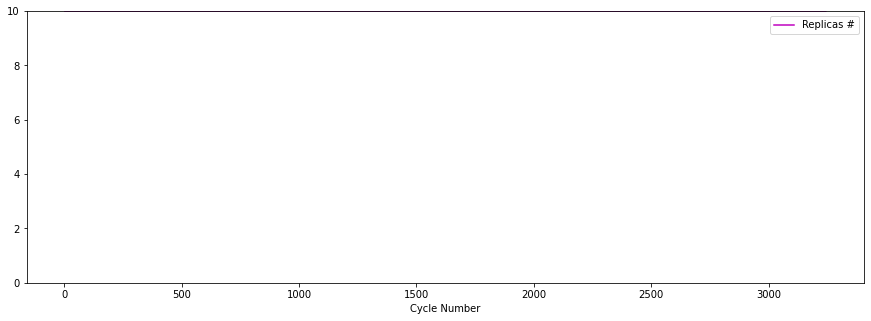

In [12]:
fig, ax = plt.subplots(figsize=(15,5)) # Create the figure and axes object
exp1['replicas'].plot(legend=True,label='Replicas #',color='m')
plt.xlabel('Cycle Number')
ax.set_ylim(0,10)
plt.savefig(f'{exp_s}/replicas_number.png')

## Response time vs. Arrival rate

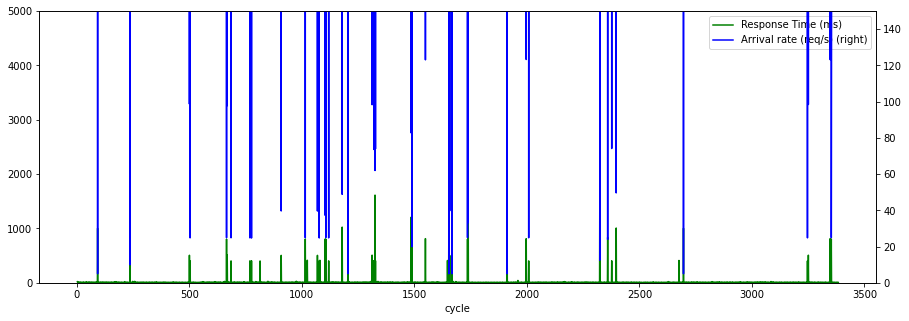

In [40]:
fig, ax = plt.subplots(figsize=(15,5))
exp1['response_time'].plot(legend=True,label='Response Time (ms)',color='g')
exp1['arrival_rate'].plot(legend=True,label='Arrival rate (req/s)',secondary_y=True,color='b')
ax.set_ylim(0,5000)
ax.right_ax.set_ylim([0,150])

plt.savefig(f'{exp_s}/response_time_vs_arrival_rate.png')

## service price vs avg. number of ads

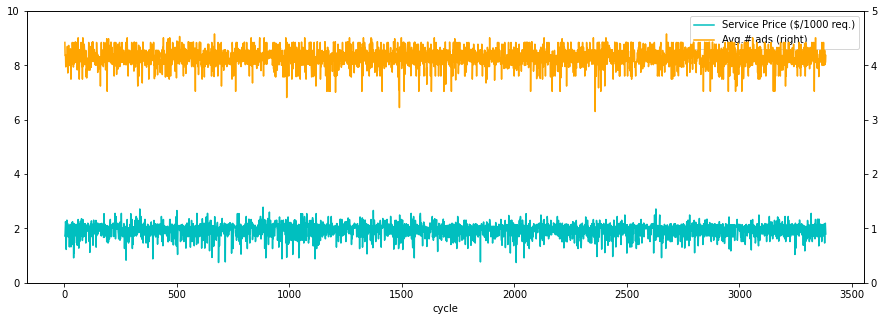

In [41]:
fig, ax = plt.subplots(figsize=(15,5)) # Create the figure and axes object
# plt.figure(num=None,)
# Plot the first x and y axes:
(exp1['predicted_p_s']*1000).plot(legend=True,label='Service Price ($/1000 req.)',color='c')
exp1['predicted_gamma'].plot(legend=True,label='Avg.# ads',secondary_y=True,color='orange')
ax.set_ylim(0,10)
ax.right_ax.set_ylim([0,5])
plt.savefig(f'{exp_s}/service_price_vs_#_of_ads.png')

## Service profit vs. Client profit vs user satisfaction

In [44]:
exp1['service_profit'] = exp1['predicted_p_s']*exp1['arrival_rate'] - p_i*exp1['W'] - exp1['data_payload']*p_n*exp1['arrival_rate']
exp1['client_profit'] = (exp1['predicted_gamma']*RPM/1000 - H - exp1['predicted_p_s'])*exp1['arrival_rate']
exp1['user_satisfaction'] = 0.5*(gamma_u - exp1['predicted_gamma'])/(gamma_u-gamma_l) + 0.5*(R_u - exp1['response_time'])/(R_u - R_l)

<ipython-input-44-634cab59c365>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp1['service_profit'] = exp1['predicted_p_s']*exp1['arrival_rate'] - p_i*exp1['W'] - exp1['data_payload']*p_n*exp1['arrival_rate']
<ipython-input-44-634cab59c365>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp1['client_profit'] = (exp1['predicted_gamma']*RPM/1000 - H - exp1['predicted_p_s'])*exp1['arrival_rate']
<ipython-input-44-634cab59c365>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

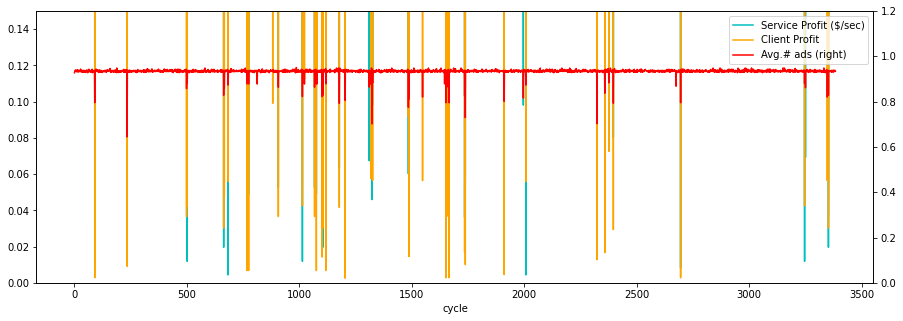

In [45]:
fig, ax = plt.subplots(figsize=(15,5)) # Create the figure and axes object
# plt.figure(num=None,)
# Plot the first x and y axes:
exp1['service_profit'].plot(legend=True,label='Service Profit ($/sec)',color='c')
exp1['client_profit'].plot(legend=True,label='Client Profit',color='orange')
exp1['user_satisfaction'].plot(legend=True,label='Avg.# ads',secondary_y=True,color='r')
ax.set_ylim(0,0.15)
ax.right_ax.set_ylim([0,1.2])
plt.savefig('exp1/service_profit_vs_client_profit_user_satisfaction.png')